In [124]:
import requests
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np


In [94]:
class WeatherHistory:
  def __init__(self, date='20161001', addr1='Brazil', addr2='Brasilia'):
    self.key = '0b8d95327c9db58e'
    self.date = date
    self.addr1 = addr1
    self.addr2 = addr2
    self.read()


  def read(self):
    self.url = ('http://api.wunderground.com/api/' + self.key 
                 + '/history_' + self.date + '/q/' + self.addr1 
                 + '/' + self.addr2 + '.json')
    self.data = requests.get(self.url).json()    
    self.maxTemp = float(self.data['history']['dailysummary'][0]['maxtempm'])
    self.meanTemp = float(self.data['history']['dailysummary'][0]['meantempm'])    
    self.minTemp = float(self.data['history']['dailysummary'][0]['mintempm'])       
    
  def f2c(self, tempi):
    tempm = (tempi - 32.0) / 1.8
    return tempm

In [95]:
w = WeatherHistory(date='20161001', addr1='Brazil', addr2='Brasilia')

In [110]:
dateList = []
date = datetime.date(2016,9,20)
while(date < datetime.date(2016,10,21)):
  dateList.append(date)
  date = date + datetime.timedelta(days=1)

meanTempList = []
maxTempList = []
minTempList = []
  
for date in dateList:
  dateStr = date.strftime('%Y%m%d')
  w = WeatherHistory(date=dateStr, addr1='Brazil', addr2='Brasilia')
  meanTempList.append(w.meanTemp)
  maxTempList.append(w.maxTemp)
  minTempList.append(w.minTemp)  

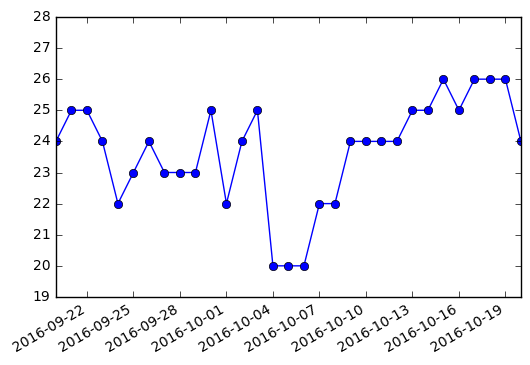

In [130]:
plt.clf()
fig, ax = plt.subplots()
ax.plot(dateList, meanTempList,'o-')
ax.set_xlim(dateList[0], dateList[-1])
ax.set_ylim(19, 28)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()
plt.show()